# [Pytorch basic document]

-----

pytorch를 활용하여 만들 수 있는 model은 무궁무진하지만 기초를 알지 못한다면 원하는 모델을 만들기는 쉽지 않다

해당 project에서는 pytorch의 기능과 함수들에 대해서 자세하게 보고 활용하여 활용 방법에 대해서 다루는 것을 목적으로 한다.

- Python Version : Python 3.13.7

참고 자료 : https://www.youtube.com/watch?v=kY14KfZQ1TI&list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1

참고자료 : https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html

-----

## 목차(contents)

- 1. Tensor (Tensor 생성, Tensor의 Attribution)
- 2. Tensor Operations
- 3. Tensor Math
- 4. Neural Network (make, train, evaluate(using test, new data), save & load model)
- 5. CNN(Convolution Neural Network) - Image fliter, Image kernel, Convolutional Layer & RGB, Pooling Layer, Train, Test, Checking Work

In [1]:
# pytorch install, numpy

%pip install --upgrade pip
%pip install torch
%pip install --upgrade torch
%pip install numpy
%pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# pytorch 모델 import

import torch

# 1. Tensor란 무엇인가?
---

tensor(텐서)는 array나 matrix와 유사한 특수 자료구조로, pytorch에서는 tensor를 통해 model으로의 input과 output 뿐만 아닌 모델의 매개변수를 encoding하는 과정에 사용된다.

tensor는 numpy의 ndarray와 유사하지만, GPU나 연산 가속을 위한 특수 하드웨어에서 실행 가능하다는 점이 다르다.

---

### Tensor의 종류

|Dimension|tensor 종류|명칭|
|:---:|:---:|:---:|
|0 dimension tensor|zeroth-order-tenso|scalar|
|1 dimension tensor|First-order-tensor|vector|
|2 dimension tensor|Second-order-tensor|matrix|
|3 dimension tensor|Third-order-tensor|tensor|
|4 dimension tensor|Fourth-order-tensor|stack with 3 dimension tensor|
|5 dimension tensor|Fifth-order-tensor|expand side with 4 dimension tensor|
|...|...|...|

![tensor의 종류](./tensor.png)

참고자료 : https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html

참고자료 : https://www.youtube.com/watch?v=2yBEZzQu8dA&list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1&index=2

이미지 출처 : Pytorch로 시작하는 딥러닝 입문



## 1) Tensor 초기화 및 생성
---

tensor 생성 당시 자료형은 자동으로 유추하여 맞게 생성되기 때문에 따로 지정할 필요는 없다.

크게 tensor의 생성 방법으로는 4가지로 나뉜다.

1) data -> tensor
2) data -> numpy array -> tensor
3) original_tensor -> duplicate_tensor(attribute 유지 O)
4) original_tensor -> duplicate_tensor(attribute 유지 X)
5) data(zero, one, random) -> tensor

---

In [3]:
# tensor 생성 (data -> tensor)

data = [[1, 2],[3, 4]] # 데이터 배열 생성
x_data = torch.tensor(data) # data를 tensor로 변환

print(x_data)

tensor([[1, 2],
        [3, 4]])


In [4]:
# tensor 생성 (data -> numpy array -> tensor)
import numpy as np

np_array = np.array(data) # numpy array 생성
x_np = torch.from_numpy(np_array) # numpy array -> tensor로 변환

print(x_np)

tensor([[1, 2],
        [3, 4]])


In [5]:
# tensor 생성 (다른 tensor -> 새로운 tensor)
# 속성의 유지여부에 따라 ones_like, rand_like를 나눠서 쓰는데 속성에는 tensor의 shape과 datatype이 해당된다.

tensor_ones = torch.ones_like(x_data) # 기존 tensor의 속성을 유지
tensor_rand = torch.rand_like(x_data, dtype=float) # 기존 tensor의 속성을 변경

print(f"Ones Tensor : \n {tensor_ones} \n")
print(f"Random Tensor : \n {tensor_rand} \n")

Ones Tensor : 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor : 
 tensor([[0.2873, 0.3271],
        [0.5799, 0.5661]], dtype=torch.float64) 



In [6]:
# tensor 생성을 random(랜덤값) 또는 constant(상수값)을 활용하여 생성하는 방법

shape = (3, 5) #tensor의 차원을 column:3, row:5로 setting

rand_tensor = torch.rand(shape) #랜덤값으로 shape에 맞게 tensor를 생성
ones_tensor = torch.ones(shape) #모든 원소값은 1로 shape에 맞게 tensor 생성
zeros_tensor = torch.zeros(shape) #모든 원소값을 0으로 shape에 맞게 tensor 생성

# 각 tensor의 구조 및 원소의 상태를 print하여 확인
print(f"rand_tensor \n {rand_tensor} \n")
print(f"ones_tensor \n {ones_tensor} \n")
print(f"zeros_tensor \n {zeros_tensor} \n")

# numpy array를 기준으로 원소 값 초기화를 통해 tensor 생성도 가능함

# torch.ones_like(t) # t와 같은 사이즈의 1로 채워진 tensor를 출력
# torch.zeros_like(t) # 모든 값을 0으로 
# torch.ones(size=[]) # 1로 채워진 size 차원의 tensor를 출력
# torch.zeros(size=[]) # 0으로 채워진 size 차원의 tensor를 출력

rand_tensor 
 tensor([[0.3998, 0.9104, 0.6639, 0.5467, 0.2666],
        [0.9702, 0.4402, 0.0533, 0.2617, 0.9259],
        [0.2060, 0.6989, 0.9589, 0.0380, 0.5797]]) 

ones_tensor 
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

zeros_tensor 
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 



## 2) Tensor의 Attribute(속성)

---

tensor의 attribute(속성)은 tensor의 shape, datatype 및 store device location을 의미한다.

따라서, 각 tensor는 이런 attribute를 모두 가지고 있기 때문에 특정 tensor의 shape/dtype/device의 속성을 확인이 가능하다

추가적인 속성 확인인 size(), dim()의 경우에는 메소드(함수)이기 때문에 (괄호)를 뺴먹지 않도록 주의해야 함.

---

In [7]:
# tensor 랜덤값으로 생성

tensor_sample = torch.rand(2, 3) #랜덤 값을 활용하여 생성한 2x3 tensor

print(f"tensor_sample \n {tensor_sample} \n") #tensor_sample을 출력
print(f"Shape of tensor : {tensor_sample.shape}") #tensor_sample의 shape을 출력
print(f"Size of tensor : {tensor_sample.size()}") #tensor_sample의 size를 출력
print(f"Dimension of tensor : {tensor_sample.dim()}") #tensor_sample의 dimension을 출력
print(f"Datatype of tensor : {tensor_sample.dtype}") #tensor_sample의 데이터 타입을 출력
print(f"Device tensor is stored on : {tensor_sample.device}") #tensor_sample이 저장된 device의 location을 출력


tensor_sample 
 tensor([[0.3041, 0.1008, 0.2470],
        [0.6956, 0.3781, 0.0254]]) 

Shape of tensor : torch.Size([2, 3])
Size of tensor : torch.Size([2, 3])
Dimension of tensor : 2
Datatype of tensor : torch.float32
Device tensor is stored on : cpu


# 2. Tensor Operation(텐서 연산)

---

선형대수 연산 기능, 수학적 계산, 인덱싱, 슬라이싱, 임의 샘플링 등 tensor 구조로 연산 기능을 지원하는 pytorch에는 다양한 함수가 존재한다.

가장 기본적인 Reshape, Slice 기법을 확인 후 수학적 tensor 연산인 Add, Subtract, Multiply, Divide, Remainders, Exponent, Shorthand, Longhand, Reassignment에 대해서 예시 코드를 통해 보도록 하겠다.

추가적으로 필요하다고 생각되는 tensor operation에 대해서는 하단의 내용을 추가할 예정이다.

Pytorch의 Tensor 연산 document : https://docs.pytorch.org/docs/stable/torch.html

참고자료 : https://www.youtube.com/watch?v=Ta3z9vZaoMc&list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1&index=4

---

### 0) tensor 생성 함수 정리

| 자료형(category) | dtype | 설명 | 대표 생성 함수 | dtype 지정 예시 |
|------------------|--------|--------|---------------------|-----------------------|
| **부호 없는 정수** | `torch.uint8` | Unsigned 8-bit | `torch.UInt8Tensor()` | `dtype=torch.uint8` |
| **정수** | `torch.int8` | Signed 8-bit | `torch.Int8Tensor()` | `dtype=torch.int8` |
| | `torch.int16` (`torch.short`) | 16-bit | `torch.ShortTensor()` | `dtype=torch.int16` |
| | `torch.int32` (`torch.int`) | 32-bit | `torch.IntTensor()` | `dtype=torch.int32` |
| | `torch.int64` (`torch.long`) | 64-bit (가장 많이 사용) | `torch.LongTensor()` | `dtype=torch.int64` |
| **부동소수점(Float)** | `torch.float16` (`torch.half`) | Half precision (16-bit) | `torch.HalfTensor()` | `dtype=torch.float16` |
| | `torch.float32` (`torch.float`) | Single precision (32-bit) | `torch.FloatTensor()` | `dtype=torch.float32` |
| | `torch.float64` (`torch.double`) | Double precision (64-bit) | `torch.DoubleTensor()` | `dtype=torch.float64` |
| **Boolean** | `torch.bool` | True/False | `torch.BoolTensor()` | `dtype=torch.bool` |

In [8]:
# tensor 생성

tensor_a = torch.tensor([1, 2, 3, 4])
tensor_b = torch.tensor([5, 6, 7, 8])

### 1) Tensor addition (덧셈)

In [9]:
# tensor addition

tensor_a + tensor_b

# another way to write addition

tensor_a.add(tensor_b)

tensor([ 6,  8, 10, 12])

In [10]:
# tensor addition longhead(일반적) version

torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

### 2) tensor subtraction (뻴셈)

In [11]:
# subtraction

tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [12]:
# subtraction function

torch.sub(tensor_b, tensor_a)

tensor([4, 4, 4, 4])

### 3) tensor multiplication (곱셈)

In [13]:
# multiplication

tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [14]:
# multiplication longhand

torch.mul(tensor_a, tensor_b)

tensor([ 5, 12, 21, 32])

### 4) tensor division (나눗셈)

In [15]:
# division

tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [16]:
# division longhand

torch.div(tensor_a, tensor_b)

tensor([0.2000, 0.3333, 0.4286, 0.5000])

### 5) tensor reminder modulus (나머지 연산)

In [17]:
# reminder modulus(나머지)

tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [18]:
# remainder longhand (나머지)

torch.remainder(tensor_b, tensor_a)

tensor([0, 0, 1, 0])

### 6) tensor exponents/power (지수와 제곱근) 

In [19]:
# exponents / power (제곱)

torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

### 7) reassignment (기존 tensor 값 재할당)

In [20]:
# reassignment

tensor_a + tensor_b

tensor_a = tensor_a + tensor_b

tensor_a.add_(tensor_b)

tensor([11, 14, 17, 20])

### 8) 추가적인 tensor 속성들 (내적 곱셈, 원소별 곱셈, 형태 변환, cat, stack)

In [21]:
# 데이터 생성
data_1 = [[1, 3, 4], [5, 6, 7], [9, 10, 11]]
data_2 = [[11, 13, 14], [15, 16, 17], [19, 110, 111]]

# numpy array로 변환
t1 = np.array(data_1)
t2 = np.array(data_2)

# numpy array -> tensor로 변환
tensor_1 = torch.FloatTensor(t1)
tensor_2 = torch.FloatTensor(t2)

In [22]:
# tensor의 세부 속성 (mean, sum, max, argmax)

print(tensor_2.mean()) #tensor 원소의 전체값 평균
print(tensor_2.sum()) #tensor 원소의 전체값의 합 (dim=0)을 달면 차원제거 가능
print(tensor_2.max()) #tensor 원소 중 가장 큰 값 (dim=0)을 달면 차원제거 가능
print(tensor_2.argmax()) #tensor의 모든 원소 중 가장 큰 값의 index 출력 (dim=0)을 탈면 차원제거 가능

tensor(36.2222)
tensor(326.)
tensor(111.)
tensor(8)


In [23]:
# tensor의 내적 곱셈 및 원소별 곱셈

result1 = tensor_1.matmul(tensor_2)
result2 = tensor_1.mul(tensor_2)

print(f"Matrix Multiplication result : \n{result1}\n")
print(f"element-wise Multiplication : \n{result2}\n")

Matrix Multiplication result : 
tensor([[ 132.,  501.,  509.],
        [ 278.,  931.,  949.],
        [ 458., 1487., 1517.]])

element-wise Multiplication : 
tensor([[  11.,   39.,   56.],
        [  75.,   96.,  119.],
        [ 171., 1100., 1221.]])



In [24]:
# tensor의 형태 변형 및 변환 (view(), squeeze(), unsqueeze())

reshape_tensor = tensor_1.view([3, 3]) #tensor의 형태 변경(numpy의 reshape 기능)
print(reshape_tensor)

reshape_tensor.squeeze(1) #tensor의 차원을 제거
print(reshape_tensor)

reshape_tensor.unsqueeze(dim=1) #tensor의 차원을 특정 위치에 차원을 추가함

tensor([[ 1.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 9., 10., 11.]])
tensor([[ 1.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 9., 10., 11.]])


tensor([[[ 1.,  3.,  4.]],

        [[ 5.,  6.,  7.]],

        [[ 9., 10., 11.]]])

In [25]:
# tensor 병합(cat()), 연결(stack())

new_tensor = torch.cat([tensor_1, tensor_2], dim=0) #tensor 병합하여 하나의 tensor 생성
new_stack_tensor = torch.stack([tensor_1, tensor_2], dim=0) #tensor를 연결 - 병합하지 않고 연결만 진행함

print(new_tensor)
print(new_stack_tensor)

tensor([[  1.,   3.,   4.],
        [  5.,   6.,   7.],
        [  9.,  10.,  11.],
        [ 11.,  13.,  14.],
        [ 15.,  16.,  17.],
        [ 19., 110., 111.]])
tensor([[[  1.,   3.,   4.],
         [  5.,   6.,   7.],
         [  9.,  10.,  11.]],

        [[ 11.,  13.,  14.],
         [ 15.,  16.,  17.],
         [ 19., 110., 111.]]])


# 3. Neural Network Model (인공 신경망 모델)

신경망 모델은 인간의 뇌 신경망 구조를 기반으로 구현하여 만든 컴퓨터 모델을 의미하며, 상호 연결된 node들이 계층적으로 데이터를 처리하며 학습하는 모델을 의미한다

하단의 이미지는 가장 기본적인 Neural Network를 표현한 자료로서, 데이터를 처음에 모델에 input으로 전달하면 input_layer를 통해서 값이 전달되고 각 노드간의

가중치값을 조정 후 활성화 함수를 통과하며 마지막에는 예측값 또는 결과값을 출력한다. 순서) input_layer -> hidden_layer -> output_layer

![neural network image](./neural_network.png)

신경망 구축 후 학습, 검증, 실제 데이터를 통한 예측의 과정에 사용할 데이터는 Iris small classic dataset을 사용하였다.

Data 출처 : https://archive.ics.uci.edu/dataset/53/iris

In [26]:
# Neural network 구현을 위한 라이브러리 import 진행

import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# 신경망 구조를 담은 클래스를 생성

class Model(nn.Module):
    # Input Layer (4) -> Hidden Layer 1 -> Hidden Layer 2 -> Hidden Layer 3 -> Output Layer 1의 구조로 신경망을 구성한다.
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, h3 = 8, out_features = 3): # 학습시킬 데이터의 특성이 4개이기 때문에 features는 4로 지정
        super().__init__() #nn.module을 객체화 진행
        self.fc1 = nn.Linear(in_features, h1) #각 Layer 별로 노드들 간의 연결 관계를 지정하여 Fully-Connected-Layer의 구조로 만들어줌
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x): # 순전파 함수 선언
        x = F.relu(self.fc1(x)) #relu 활성화 함수 적용
        x = F.relu(self.fc2(x)) #relu 활성화 함수 적용
        x = F.relu(self.fc3(x)) #relu 활성화 함수 적용
        
        return x # 신경망 학습 후 결과물 반환

In [28]:
# 위에서 만든 신경망에 데이터를 넣어서 학습을 진행

# 시드겂을 지정
torch.manual_seed(41)

# 모델을 지정
model = Model()

In [29]:
# 필요 라이브러리 설치 및 import 진행

%pip install pandas
%pip install --upgrade pandas
%pip install scikit-learn
%pip install --upgrade scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
# 학습시킬 iris 데이터 sklearn 라이브러리 내부에서 호출

from sklearn.datasets import load_iris
iris = load_iris()
type(iris)


sklearn.utils._bunch.Bunch

In [31]:
# iris 데이터셋의 key값 확인

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
# 원하는 데이터값만 뽑아서 데이터 프레임으로 생성

my_df = pd.DataFrame(iris['data'], columns=iris['feature_names']) #dataframe의 구성을 특징 이름을 열로, 데이터 값들을 행으로 지정
my_df['target'] = iris['target'] # iris 데이터셋의 target 데이터를 my_df에 추가
my_df['variety'] = my_df['target'].apply(lambda idx : iris['target_names'][idx]) # iris target 인덱스 값에 맞는 target 이름을 따로 열에 인덱싱 진행
my_df = my_df.drop(columns=['target']) # target 데이터 열을 모두 삭제

my_df.head() # my_df의 윗부분 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
# variety 열에 해당하는 데이터를 string -> integer로 변경

my_df['variety'] = my_df['variety'].replace('setosa', 0.0) # setosa -> 0.0 으로 변경
my_df['variety'] = my_df['variety'].replace('versicolor', 1.0) # versicolor -> 1.0 으로 변경
my_df['variety'] = my_df['variety'].replace('virginica', 2.0) # virginica -> 2.0 으로 변경

# 변경 후 dataframe 확인
my_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [55]:
# Train Dataset과 Test Dataset으로 split 진행

X = my_df.drop('variety', axis=1) # X에는 variety 열 제외 모든 데이터값 저장
Y = my_df['variety'] # Y에는 variety 열 데이터만 저장

In [56]:
# X와 Y 데이터를 numpy array로 변경

X = X.values
Y = Y.values

In [58]:
from sklearn.model_selection import train_test_split #훈련,테스트 데이터 분할 함수 import

# Train Data와 Test Data로 분리 진행
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [59]:
# 신경망 모델로 input이 가능하도록 데이터를 float tensor 형태로 변환

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [60]:
# variety 값이 들어있는 Y 데이터들은 tensor long 형태로 변환

Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [61]:
# 함수의 손실값을 줄이기 위한 손실함수와 최적화 함수 및 Learning rate 지정

criterion = nn.CrossEntropyLoss() #CrossEntropyLoss함수 사용
optimize = torch.optim.Adam(model.parameters(), lr=0.01) #손실 함수와 Learning rate 값 지정

In [64]:
# 신경망 모델의 구조 확인

model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [67]:
# 모델에 데이터를 전달하여 학습 진행 (epoch는 데이터 전체를 활용하여 모델을 학습시키는 횟수를 의미한다)

epochs = 1000 #학습 반복 횟수 지정 1000번으로
losses = [] #각 epoch별 loss값을 리스트에 저장

for i in range(epochs):
    # 순전파 진행 및 예측 
    y_pred = model.forward(X_train)
    
    # loss값 계산
    loss = criterion(y_pred, Y_train)
    # loss값을 매 epoch마다 losses에 저장
    losses.append(loss.detach().numpy())
    
    # epoch 10 마다 loss값 상태 출력
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    # 매 epoch마다 순전파를 통한 학습의 결과인 loss값을 기반으로 역전파(back propagation)을 진행하여 노드간의 가중치값을 fine turning 진행
    optimize.zero_grad()
    loss.backward() #역전파
    optimize.step()


Epoch: 0 and loss: 0.14506036043167114
Epoch: 10 and loss: 0.10846153646707535
Epoch: 20 and loss: 0.0855686143040657
Epoch: 30 and loss: 0.0708850845694542
Epoch: 40 and loss: 0.06099588796496391
Epoch: 50 and loss: 0.05387398973107338
Epoch: 60 and loss: 0.04677514731884003
Epoch: 70 and loss: 0.04209965467453003
Epoch: 80 and loss: 0.03865620866417885
Epoch: 90 and loss: 0.035981498658657074
Epoch: 100 and loss: 0.03376966342329979
Epoch: 110 and loss: 0.03190917149186134
Epoch: 120 and loss: 0.030310077592730522
Epoch: 130 and loss: 0.02891520783305168
Epoch: 140 and loss: 0.027683071792125702
Epoch: 150 and loss: 0.026581954210996628
Epoch: 160 and loss: 0.02558976039290428
Epoch: 170 and loss: 0.02468823455274105
Epoch: 180 and loss: 0.023863371461629868
Epoch: 190 and loss: 0.023103969171643257
Epoch: 200 and loss: 0.02240113727748394
Epoch: 210 and loss: 0.02174755372107029
Epoch: 220 and loss: 0.021137112751603127
Epoch: 230 and loss: 0.020564397796988487
Epoch: 240 and loss: 

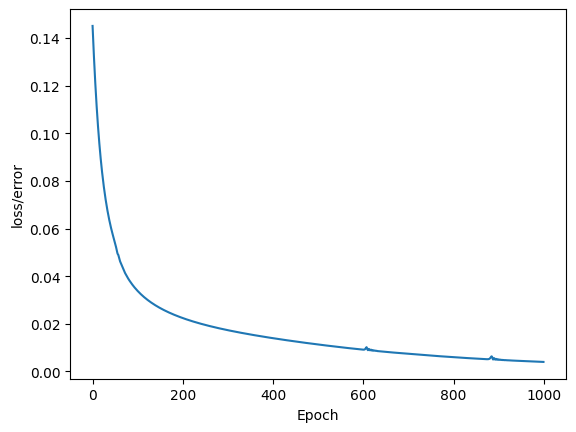

In [68]:
# loss값을 활용하여 그래프를 통해 값의 변화 추이를 확인

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.show()